# Bangladesh Weather Dataset GRU

In [121]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

## Dataset importing

In [122]:
!cp "/content/drive/MyDrive/Colab Notebooks/Bangladesh/Temp_and_rain.csv" "/content/bangladeshweather.csv"

In [123]:
df = pd.read_csv('/content/bangladeshweather.csv')
df

,tem,Month,Year,rain
0,16.9760,1,1901,18.53560
1,19.9026,2,1901,16.25480
2,24.3158,3,1901,70.79810
3,28.1834,4,1901,66.16160
4,27.8892,5,1901,267.21500
...,...,...,...,...
1375,28.0642,8,2015,512.12700
1376,28.1230,9,2015,353.86900
1377,26.8624,10,2015,81.59940
1378,23.1842,11,2015,4.60815


In [124]:
df.columns

Index(['tem', 'Month', 'Year', 'rain'], dtype='object')

In [125]:
#df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
#df[:25]

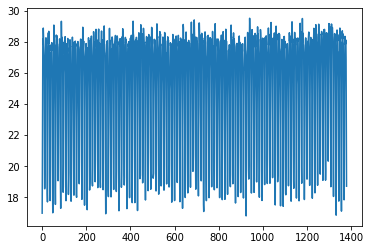

In [126]:
temp = df['tem']
temp.plot()

In [127]:
#df[' _tempm'].fillna(df[' _tempm'].mean(), inplace = True)
#df[' _tempm'] = df[' _tempm'].interpolate()

In [128]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [129]:
WINDOW_SIZE = 30
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((1350, 30, 1), (1350,))

## Splitting the dataset

In [130]:
X_train1, y_train1 = X1[:1096], y1[:1096]
X_val1, y_val1 = X1[1096:1233], y1[1096:1233]
X_test1, y_test1 = X1[1233:], y1[1233:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((1096, 30, 1), (1096,), (137, 30, 1), (137,), (117, 30, 1), (117,))

## Building the network

In [131]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model3 = Sequential()
model3.add(InputLayer((30, 1)))
model3.add(GRU(64))
model3.add(Dense(32, 'relu'))
model3.add(Dense(32, 'relu'))
model3.add(Dense(16, 'relu'))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 64)                12864     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 16,673
Trainable params: 16,673
Non-trai

In [132]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

## Training

In [133]:
history1 = model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=150, callbacks=[cp3])

Epoch 1/150
33/35 [===========================>..] - ETA: 0s - loss: 623.3682 - root_mean_squared_error: 24.9673

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 8s 167ms/step - loss: 623.5195 - root_mean_squared_error: 24.9704 - val_loss: 630.3797 - val_root_mean_squared_error: 25.1074
Epoch 2/150
33/35 [===========================>..] - ETA: 0s - loss: 607.6472 - root_mean_squared_error: 24.6505

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 141ms/step - loss: 610.0351 - root_mean_squared_error: 24.6989 - val_loss: 613.2280 - val_root_mean_squared_error: 24.7634
Epoch 3/150
34/35 [============================>.] - ETA: 0s - loss: 590.3342 - root_mean_squared_error: 24.2968

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 155ms/step - loss: 589.8224 - root_mean_squared_error: 24.2863 - val_loss: 588.7496 - val_root_mean_squared_error: 24.2642
Epoch 4/150
32/35 [==========================>...] - ETA: 0s - loss: 562.0651 - root_mean_squared_error: 23.7079

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 138ms/step - loss: 561.2892 - root_mean_squared_error: 23.6915 - val_loss: 555.4676 - val_root_mean_squared_error: 23.5684
Epoch 5/150
35/35 [==============================] - ETA: 0s - loss: 523.4828 - root_mean_squared_error: 22.8797

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 153ms/step - loss: 523.4828 - root_mean_squared_error: 22.8797 - val_loss: 511.5208 - val_root_mean_squared_error: 22.6168
Epoch 6/150
35/35 [==============================] - ETA: 0s - loss: 474.9208 - root_mean_squared_error: 21.7927

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 140ms/step - loss: 474.9208 - root_mean_squared_error: 21.7927 - val_loss: 456.6411 - val_root_mean_squared_error: 21.3692
Epoch 7/150
35/35 [==============================] - ETA: 0s - loss: 415.5364 - root_mean_squared_error: 20.3847

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 151ms/step - loss: 415.5364 - root_mean_squared_error: 20.3847 - val_loss: 391.0757 - val_root_mean_squared_error: 19.7756
Epoch 8/150
35/35 [==============================] - ETA: 0s - loss: 347.2921 - root_mean_squared_error: 18.6358

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 138ms/step - loss: 347.2921 - root_mean_squared_error: 18.6358 - val_loss: 318.8720 - val_root_mean_squared_error: 17.8570
Epoch 9/150
32/35 [==========================>...] - ETA: 0s - loss: 275.3274 - root_mean_squared_error: 16.5930

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 135ms/step - loss: 275.1665 - root_mean_squared_error: 16.5881 - val_loss: 245.4561 - val_root_mean_squared_error: 15.6670
Epoch 10/150
35/35 [==============================] - ETA: 0s - loss: 204.3251 - root_mean_squared_error: 14.2942

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 158ms/step - loss: 204.3251 - root_mean_squared_error: 14.2942 - val_loss: 175.3623 - val_root_mean_squared_error: 13.2424
Epoch 11/150
33/35 [===========================>..] - ETA: 0s - loss: 140.1004 - root_mean_squared_error: 11.8364

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 148ms/step - loss: 139.2745 - root_mean_squared_error: 11.8015 - val_loss: 114.1109 - val_root_mean_squared_error: 10.6823
Epoch 12/150
34/35 [============================>.] - ETA: 0s - loss: 83.5778 - root_mean_squared_error: 9.1421

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 138ms/step - loss: 83.5627 - root_mean_squared_error: 9.1413 - val_loss: 63.1195 - val_root_mean_squared_error: 7.9448
Epoch 13/150
33/35 [===========================>..] - ETA: 0s - loss: 44.6899 - root_mean_squared_error: 6.6850

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 152ms/step - loss: 44.2666 - root_mean_squared_error: 6.6533 - val_loss: 32.7145 - val_root_mean_squared_error: 5.7197
Epoch 14/150
34/35 [============================>.] - ETA: 0s - loss: 23.8383 - root_mean_squared_error: 4.8825

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 138ms/step - loss: 23.8147 - root_mean_squared_error: 4.8800 - val_loss: 19.2474 - val_root_mean_squared_error: 4.3872
Epoch 15/150
32/35 [==========================>...] - ETA: 0s - loss: 16.1333 - root_mean_squared_error: 4.0166

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 159ms/step - loss: 16.0225 - root_mean_squared_error: 4.0028 - val_loss: 14.6692 - val_root_mean_squared_error: 3.8300
Epoch 16/150
34/35 [============================>.] - ETA: 0s - loss: 13.8811 - root_mean_squared_error: 3.7257

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 140ms/step - loss: 13.9394 - root_mean_squared_error: 3.7335 - val_loss: 13.4440 - val_root_mean_squared_error: 3.6666
Epoch 17/150
34/35 [============================>.] - ETA: 0s - loss: 13.4582 - root_mean_squared_error: 3.6685

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 151ms/step - loss: 13.4835 - root_mean_squared_error: 3.6720 - val_loss: 13.1936 - val_root_mean_squared_error: 3.6323
Epoch 18/150
35/35 [==============================] - ETA: 0s - loss: 13.4175 - root_mean_squared_error: 3.6630

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 136ms/step - loss: 13.4175 - root_mean_squared_error: 3.6630 - val_loss: 13.0974 - val_root_mean_squared_error: 3.6190
Epoch 19/150
33/35 [===========================>..] - ETA: 0s - loss: 13.3772 - root_mean_squared_error: 3.6575

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 152ms/step - loss: 13.3917 - root_mean_squared_error: 3.6595 - val_loss: 13.0437 - val_root_mean_squared_error: 3.6116
Epoch 20/150
35/35 [==============================] - ETA: 0s - loss: 13.3743 - root_mean_squared_error: 3.6571

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 137ms/step - loss: 13.3743 - root_mean_squared_error: 3.6571 - val_loss: 13.0225 - val_root_mean_squared_error: 3.6087
Epoch 21/150
34/35 [============================>.] - ETA: 0s - loss: 13.2044 - root_mean_squared_error: 3.6338

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 137ms/step - loss: 13.2370 - root_mean_squared_error: 3.6383 - val_loss: 12.7602 - val_root_mean_squared_error: 3.5721
Epoch 22/150
34/35 [============================>.] - ETA: 0s - loss: 12.7245 - root_mean_squared_error: 3.5671

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 153ms/step - loss: 12.6684 - root_mean_squared_error: 3.5593 - val_loss: 11.8266 - val_root_mean_squared_error: 3.4390
Epoch 23/150
34/35 [============================>.] - ETA: 0s - loss: 10.9393 - root_mean_squared_error: 3.3075

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 146ms/step - loss: 10.9250 - root_mean_squared_error: 3.3053 - val_loss: 10.1820 - val_root_mean_squared_error: 3.1909
Epoch 24/150
34/35 [============================>.] - ETA: 0s - loss: 9.4847 - root_mean_squared_error: 3.0797

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 138ms/step - loss: 9.5044 - root_mean_squared_error: 3.0829 - val_loss: 9.0870 - val_root_mean_squared_error: 3.0145
Epoch 25/150
34/35 [============================>.] - ETA: 0s - loss: 8.7898 - root_mean_squared_error: 2.9648

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 158ms/step - loss: 8.7799 - root_mean_squared_error: 2.9631 - val_loss: 8.3922 - val_root_mean_squared_error: 2.8969
Epoch 26/150
34/35 [============================>.] - ETA: 0s - loss: 8.1704 - root_mean_squared_error: 2.8584

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 139ms/step - loss: 8.1434 - root_mean_squared_error: 2.8537 - val_loss: 7.6158 - val_root_mean_squared_error: 2.7597
Epoch 27/150
34/35 [============================>.] - ETA: 0s - loss: 7.0631 - root_mean_squared_error: 2.6576

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 155ms/step - loss: 7.0565 - root_mean_squared_error: 2.6564 - val_loss: 6.7049 - val_root_mean_squared_error: 2.5894
Epoch 28/150
34/35 [============================>.] - ETA: 0s - loss: 6.2477 - root_mean_squared_error: 2.4995

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 146ms/step - loss: 6.2726 - root_mean_squared_error: 2.5045 - val_loss: 6.0322 - val_root_mean_squared_error: 2.4560
Epoch 29/150
32/35 [==========================>...] - ETA: 0s - loss: 5.7482 - root_mean_squared_error: 2.3975

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 138ms/step - loss: 5.6876 - root_mean_squared_error: 2.3849 - val_loss: 5.4334 - val_root_mean_squared_error: 2.3310
Epoch 30/150
32/35 [==========================>...] - ETA: 0s - loss: 5.0647 - root_mean_squared_error: 2.2505

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 157ms/step - loss: 5.0668 - root_mean_squared_error: 2.2510 - val_loss: 4.7946 - val_root_mean_squared_error: 2.1897
Epoch 31/150
35/35 [==============================] - ETA: 0s - loss: 4.3657 - root_mean_squared_error: 2.0894

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 149ms/step - loss: 4.3657 - root_mean_squared_error: 2.0894 - val_loss: 4.2133 - val_root_mean_squared_error: 2.0526
Epoch 32/150
35/35 [==============================] - ETA: 0s - loss: 3.8567 - root_mean_squared_error: 1.9638

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 136ms/step - loss: 3.8567 - root_mean_squared_error: 1.9638 - val_loss: 3.7504 - val_root_mean_squared_error: 1.9366
Epoch 33/150
34/35 [============================>.] - ETA: 0s - loss: 3.4355 - root_mean_squared_error: 1.8535

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 153ms/step - loss: 3.4469 - root_mean_squared_error: 1.8566 - val_loss: 3.4157 - val_root_mean_squared_error: 1.8482
Epoch 34/150
35/35 [==============================] - ETA: 0s - loss: 3.0606 - root_mean_squared_error: 1.7495

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 145ms/step - loss: 3.0606 - root_mean_squared_error: 1.7495 - val_loss: 2.9835 - val_root_mean_squared_error: 1.7273
Epoch 35/150
32/35 [==========================>...] - ETA: 0s - loss: 2.7039 - root_mean_squared_error: 1.6444

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 136ms/step - loss: 2.6799 - root_mean_squared_error: 1.6370 - val_loss: 2.6457 - val_root_mean_squared_error: 1.6266
Epoch 36/150
33/35 [===========================>..] - ETA: 0s - loss: 2.3764 - root_mean_squared_error: 1.5415

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 157ms/step - loss: 2.3741 - root_mean_squared_error: 1.5408 - val_loss: 2.3914 - val_root_mean_squared_error: 1.5464
Epoch 37/150
32/35 [==========================>...] - ETA: 0s - loss: 2.2002 - root_mean_squared_error: 1.4833

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 150ms/step - loss: 2.1629 - root_mean_squared_error: 1.4707 - val_loss: 2.1727 - val_root_mean_squared_error: 1.4740
Epoch 38/150
33/35 [===========================>..] - ETA: 0s - loss: 1.9859 - root_mean_squared_error: 1.4092

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 143ms/step - loss: 1.9705 - root_mean_squared_error: 1.4037 - val_loss: 1.9785 - val_root_mean_squared_error: 1.4066
Epoch 39/150
35/35 [==============================] - ETA: 0s - loss: 1.8510 - root_mean_squared_error: 1.3605

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 158ms/step - loss: 1.8510 - root_mean_squared_error: 1.3605 - val_loss: 1.8642 - val_root_mean_squared_error: 1.3654
Epoch 40/150
33/35 [===========================>..] - ETA: 0s - loss: 1.7714 - root_mean_squared_error: 1.3309

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 141ms/step - loss: 1.7667 - root_mean_squared_error: 1.3292 - val_loss: 1.8036 - val_root_mean_squared_error: 1.3430
Epoch 41/150
35/35 [==============================] - ETA: 0s - loss: 1.6920 - root_mean_squared_error: 1.3008

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 153ms/step - loss: 1.6920 - root_mean_squared_error: 1.3008 - val_loss: 1.7620 - val_root_mean_squared_error: 1.3274
Epoch 42/150
34/35 [============================>.] - ETA: 0s - loss: 1.6304 - root_mean_squared_error: 1.2769

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 138ms/step - loss: 1.6224 - root_mean_squared_error: 1.2738 - val_loss: 1.6230 - val_root_mean_squared_error: 1.2740
Epoch 43/150
35/35 [==============================] - ETA: 0s - loss: 1.5561 - root_mean_squared_error: 1.2474

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 136ms/step - loss: 1.5561 - root_mean_squared_error: 1.2474 - val_loss: 1.5395 - val_root_mean_squared_error: 1.2408
Epoch 44/150
35/35 [==============================] - ETA: 0s - loss: 1.5117 - root_mean_squared_error: 1.2295

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 157ms/step - loss: 1.5117 - root_mean_squared_error: 1.2295 - val_loss: 1.4793 - val_root_mean_squared_error: 1.2162
Epoch 45/150
33/35 [===========================>..] - ETA: 0s - loss: 1.4531 - root_mean_squared_error: 1.2055

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 151ms/step - loss: 1.4605 - root_mean_squared_error: 1.2085 - val_loss: 1.4311 - val_root_mean_squared_error: 1.1963
Epoch 46/150
33/35 [===========================>..] - ETA: 0s - loss: 1.4073 - root_mean_squared_error: 1.1863

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 136ms/step - loss: 1.4206 - root_mean_squared_error: 1.1919 - val_loss: 1.4116 - val_root_mean_squared_error: 1.1881
Epoch 47/150
35/35 [==============================] - ETA: 0s - loss: 1.3832 - root_mean_squared_error: 1.1761

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 150ms/step - loss: 1.3832 - root_mean_squared_error: 1.1761 - val_loss: 1.3326 - val_root_mean_squared_error: 1.1544
Epoch 48/150
35/35 [==============================] - 1s 19ms/step - loss: 1.3491 - root_mean_squared_error: 1.1615 - val_loss: 1.3519 - val_root_mean_squared_error: 1.1627
Epoch 49/150
34/35 [============================>.] - ETA: 0s - loss: 1.3216 - root_mean_squared_error: 1.1496

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 138ms/step - loss: 1.3178 - root_mean_squared_error: 1.1479 - val_loss: 1.2923 - val_root_mean_squared_error: 1.1368
Epoch 50/150
35/35 [==============================] - ETA: 0s - loss: 1.2809 - root_mean_squared_error: 1.1318

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 6s 170ms/step - loss: 1.2809 - root_mean_squared_error: 1.1318 - val_loss: 1.2422 - val_root_mean_squared_error: 1.1145
Epoch 51/150
35/35 [==============================] - ETA: 0s - loss: 1.2410 - root_mean_squared_error: 1.1140

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 6s 161ms/step - loss: 1.2410 - root_mean_squared_error: 1.1140 - val_loss: 1.1909 - val_root_mean_squared_error: 1.0913
Epoch 52/150
35/35 [==============================] - ETA: 0s - loss: 1.1541 - root_mean_squared_error: 1.0743

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 157ms/step - loss: 1.1541 - root_mean_squared_error: 1.0743 - val_loss: 1.0977 - val_root_mean_squared_error: 1.0477
Epoch 53/150
34/35 [============================>.] - ETA: 0s - loss: 1.0807 - root_mean_squared_error: 1.0396

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 136ms/step - loss: 1.0831 - root_mean_squared_error: 1.0407 - val_loss: 1.0579 - val_root_mean_squared_error: 1.0285
Epoch 54/150
34/35 [============================>.] - ETA: 0s - loss: 1.0367 - root_mean_squared_error: 1.0182

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 155ms/step - loss: 1.0320 - root_mean_squared_error: 1.0159 - val_loss: 0.9881 - val_root_mean_squared_error: 0.9940
Epoch 55/150
34/35 [============================>.] - ETA: 0s - loss: 0.9990 - root_mean_squared_error: 0.9995

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 137ms/step - loss: 0.9970 - root_mean_squared_error: 0.9985 - val_loss: 0.9764 - val_root_mean_squared_error: 0.9881
Epoch 56/150
35/35 [==============================] - ETA: 0s - loss: 0.9620 - root_mean_squared_error: 0.9808

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 153ms/step - loss: 0.9620 - root_mean_squared_error: 0.9808 - val_loss: 0.9236 - val_root_mean_squared_error: 0.9611
Epoch 57/150
34/35 [============================>.] - ETA: 0s - loss: 0.9477 - root_mean_squared_error: 0.9735

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 138ms/step - loss: 0.9468 - root_mean_squared_error: 0.9730 - val_loss: 0.9169 - val_root_mean_squared_error: 0.9575
Epoch 58/150
34/35 [============================>.] - ETA: 0s - loss: 0.9097 - root_mean_squared_error: 0.9538

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 138ms/step - loss: 0.9123 - root_mean_squared_error: 0.9551 - val_loss: 0.9039 - val_root_mean_squared_error: 0.9508
Epoch 59/150
35/35 [==============================] - ETA: 0s - loss: 0.9002 - root_mean_squared_error: 0.9488

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 156ms/step - loss: 0.9002 - root_mean_squared_error: 0.9488 - val_loss: 0.8801 - val_root_mean_squared_error: 0.9381
Epoch 60/150
33/35 [===========================>..] - ETA: 0s - loss: 0.8651 - root_mean_squared_error: 0.9301

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 153ms/step - loss: 0.8657 - root_mean_squared_error: 0.9304 - val_loss: 0.8715 - val_root_mean_squared_error: 0.9335
Epoch 61/150
35/35 [==============================] - ETA: 0s - loss: 0.8404 - root_mean_squared_error: 0.9167

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 140ms/step - loss: 0.8404 - root_mean_squared_error: 0.9167 - val_loss: 0.8257 - val_root_mean_squared_error: 0.9087
Epoch 62/150
34/35 [============================>.] - ETA: 0s - loss: 0.8457 - root_mean_squared_error: 0.9196

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 158ms/step - loss: 0.8419 - root_mean_squared_error: 0.9175 - val_loss: 0.7974 - val_root_mean_squared_error: 0.8930
Epoch 63/150
35/35 [==============================] - 1s 19ms/step - loss: 0.7976 - root_mean_squared_error: 0.8931 - val_loss: 0.8240 - val_root_mean_squared_error: 0.9077
Epoch 64/150
35/35 [==============================] - ETA: 0s - loss: 0.7874 - root_mean_squared_error: 0.8874

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 140ms/step - loss: 0.7874 - root_mean_squared_error: 0.8874 - val_loss: 0.7552 - val_root_mean_squared_error: 0.8690
Epoch 65/150
35/35 [==============================] - 1s 19ms/step - loss: 0.7635 - root_mean_squared_error: 0.8738 - val_loss: 0.7747 - val_root_mean_squared_error: 0.8801
Epoch 66/150
33/35 [===========================>..] - ETA: 0s - loss: 0.7442 - root_mean_squared_error: 0.8627

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 155ms/step - loss: 0.7396 - root_mean_squared_error: 0.8600 - val_loss: 0.7497 - val_root_mean_squared_error: 0.8659
Epoch 67/150
34/35 [============================>.] - ETA: 0s - loss: 0.7249 - root_mean_squared_error: 0.8514

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 139ms/step - loss: 0.7229 - root_mean_squared_error: 0.8502 - val_loss: 0.7053 - val_root_mean_squared_error: 0.8398
Epoch 68/150
33/35 [===========================>..] - ETA: 0s - loss: 0.7081 - root_mean_squared_error: 0.8415

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 154ms/step - loss: 0.7065 - root_mean_squared_error: 0.8406 - val_loss: 0.6946 - val_root_mean_squared_error: 0.8334
Epoch 69/150
33/35 [===========================>..] - ETA: 0s - loss: 0.6777 - root_mean_squared_error: 0.8232

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 141ms/step - loss: 0.6804 - root_mean_squared_error: 0.8249 - val_loss: 0.6945 - val_root_mean_squared_error: 0.8334
Epoch 70/150
33/35 [===========================>..] - ETA: 0s - loss: 0.6381 - root_mean_squared_error: 0.7988

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 141ms/step - loss: 0.6382 - root_mean_squared_error: 0.7989 - val_loss: 0.6709 - val_root_mean_squared_error: 0.8191
Epoch 71/150
35/35 [==============================] - ETA: 0s - loss: 0.6291 - root_mean_squared_error: 0.7932

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 6s 163ms/step - loss: 0.6291 - root_mean_squared_error: 0.7932 - val_loss: 0.6323 - val_root_mean_squared_error: 0.7951
Epoch 72/150
35/35 [==============================] - 1s 20ms/step - loss: 0.6051 - root_mean_squared_error: 0.7779 - val_loss: 0.6501 - val_root_mean_squared_error: 0.8063
Epoch 73/150
34/35 [============================>.] - ETA: 0s - loss: 0.5994 - root_mean_squared_error: 0.7742

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 149ms/step - loss: 0.5981 - root_mean_squared_error: 0.7734 - val_loss: 0.6283 - val_root_mean_squared_error: 0.7926
Epoch 74/150
34/35 [============================>.] - ETA: 0s - loss: 0.5936 - root_mean_squared_error: 0.7704

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 142ms/step - loss: 0.5913 - root_mean_squared_error: 0.7690 - val_loss: 0.6103 - val_root_mean_squared_error: 0.7812
Epoch 75/150
35/35 [==============================] - 1s 19ms/step - loss: 0.5757 - root_mean_squared_error: 0.7587 - val_loss: 0.6448 - val_root_mean_squared_error: 0.8030
Epoch 76/150
35/35 [==============================] - 1s 19ms/step - loss: 0.5698 - root_mean_squared_error: 0.7549 - val_loss: 0.6472 - val_root_mean_squared_error: 0.8045
Epoch 77/150
35/35 [==============================] - ETA: 0s - loss: 0.5672 - root_mean_squared_error: 0.7531

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 154ms/step - loss: 0.5672 - root_mean_squared_error: 0.7531 - val_loss: 0.5849 - val_root_mean_squared_error: 0.7648
Epoch 78/150
35/35 [==============================] - 1s 19ms/step - loss: 0.5638 - root_mean_squared_error: 0.7509 - val_loss: 0.5954 - val_root_mean_squared_error: 0.7716
Epoch 79/150
35/35 [==============================] - ETA: 0s - loss: 0.5471 - root_mean_squared_error: 0.7397

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 137ms/step - loss: 0.5471 - root_mean_squared_error: 0.7397 - val_loss: 0.5764 - val_root_mean_squared_error: 0.7592
Epoch 80/150
35/35 [==============================] - 1s 19ms/step - loss: 0.5464 - root_mean_squared_error: 0.7392 - val_loss: 0.5915 - val_root_mean_squared_error: 0.7691
Epoch 81/150
35/35 [==============================] - 1s 20ms/step - loss: 0.5471 - root_mean_squared_error: 0.7396 - val_loss: 0.6125 - val_root_mean_squared_error: 0.7826
Epoch 82/150
35/35 [==============================] - 1s 19ms/step - loss: 0.5310 - root_mean_squared_error: 0.7287 - val_loss: 0.6002 - val_root_mean_squared_error: 0.7747
Epoch 83/150
35/35 [==============================] - 1s 20ms/step - loss: 0.5383 - root_mean_squared_error: 0.7337 - val_loss: 0.5956 - val_root_mean_squared_error: 0.7718
Epoch 84/150
35/35 [==============================] - 1s 20ms/step - loss: 0.5237 - root_mean_squared_error: 0.7237 - val_loss: 0.5877 - val_root_m

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 157ms/step - loss: 0.5196 - root_mean_squared_error: 0.7208 - val_loss: 0.5580 - val_root_mean_squared_error: 0.7470
Epoch 86/150
35/35 [==============================] - 1s 19ms/step - loss: 0.5289 - root_mean_squared_error: 0.7272 - val_loss: 0.5846 - val_root_mean_squared_error: 0.7646
Epoch 87/150
35/35 [==============================] - 1s 19ms/step - loss: 0.5109 - root_mean_squared_error: 0.7148 - val_loss: 0.6245 - val_root_mean_squared_error: 0.7902
Epoch 88/150
35/35 [==============================] - 1s 21ms/step - loss: 0.5175 - root_mean_squared_error: 0.7194 - val_loss: 0.5817 - val_root_mean_squared_error: 0.7627
Epoch 89/150
35/35 [==============================] - 1s 19ms/step - loss: 0.5080 - root_mean_squared_error: 0.7128 - val_loss: 0.6180 - val_root_mean_squared_error: 0.7861
Epoch 90/150
35/35 [==============================] - ETA: 0s - loss: 0.5042 - root_mean_squared_error: 0.7101

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 137ms/step - loss: 0.5042 - root_mean_squared_error: 0.7101 - val_loss: 0.5569 - val_root_mean_squared_error: 0.7462
Epoch 91/150
35/35 [==============================] - 1s 19ms/step - loss: 0.5038 - root_mean_squared_error: 0.7098 - val_loss: 0.5703 - val_root_mean_squared_error: 0.7552
Epoch 92/150
33/35 [===========================>..] - ETA: 0s - loss: 0.5009 - root_mean_squared_error: 0.7077

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 139ms/step - loss: 0.5028 - root_mean_squared_error: 0.7091 - val_loss: 0.5557 - val_root_mean_squared_error: 0.7454
Epoch 93/150
35/35 [==============================] - 1s 20ms/step - loss: 0.4947 - root_mean_squared_error: 0.7034 - val_loss: 0.6385 - val_root_mean_squared_error: 0.7990
Epoch 94/150
35/35 [==============================] - 1s 21ms/step - loss: 0.5012 - root_mean_squared_error: 0.7079 - val_loss: 0.5998 - val_root_mean_squared_error: 0.7744
Epoch 95/150
35/35 [==============================] - 1s 20ms/step - loss: 0.4925 - root_mean_squared_error: 0.7018 - val_loss: 0.5953 - val_root_mean_squared_error: 0.7715
Epoch 96/150
35/35 [==============================] - 1s 19ms/step - loss: 0.4964 - root_mean_squared_error: 0.7046 - val_loss: 0.5952 - val_root_mean_squared_error: 0.7715
Epoch 97/150
35/35 [==============================] - 1s 19ms/step - loss: 0.4978 - root_mean_squared_error: 0.7056 - val_loss: 0.5612 - val_root_m

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 159ms/step - loss: 0.4864 - root_mean_squared_error: 0.6974 - val_loss: 0.5487 - val_root_mean_squared_error: 0.7407
Epoch 103/150
35/35 [==============================] - 1s 21ms/step - loss: 0.4867 - root_mean_squared_error: 0.6977 - val_loss: 0.5753 - val_root_mean_squared_error: 0.7585
Epoch 104/150
35/35 [==============================] - 1s 19ms/step - loss: 0.4773 - root_mean_squared_error: 0.6909 - val_loss: 0.6159 - val_root_mean_squared_error: 0.7848
Epoch 105/150
35/35 [==============================] - 1s 20ms/step - loss: 0.4788 - root_mean_squared_error: 0.6920 - val_loss: 0.6097 - val_root_mean_squared_error: 0.7809
Epoch 106/150
34/35 [============================>.] - ETA: 0s - loss: 0.4779 - root_mean_squared_error: 0.6913

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 153ms/step - loss: 0.4795 - root_mean_squared_error: 0.6925 - val_loss: 0.5436 - val_root_mean_squared_error: 0.7373
Epoch 107/150
35/35 [==============================] - 1s 18ms/step - loss: 0.4726 - root_mean_squared_error: 0.6875 - val_loss: 0.6369 - val_root_mean_squared_error: 0.7981
Epoch 108/150
35/35 [==============================] - 1s 19ms/step - loss: 0.4719 - root_mean_squared_error: 0.6869 - val_loss: 0.5818 - val_root_mean_squared_error: 0.7628
Epoch 109/150
35/35 [==============================] - 1s 20ms/step - loss: 0.4750 - root_mean_squared_error: 0.6892 - val_loss: 0.5773 - val_root_mean_squared_error: 0.7598
Epoch 110/150
35/35 [==============================] - 1s 20ms/step - loss: 0.4709 - root_mean_squared_error: 0.6862 - val_loss: 0.6329 - val_root_mean_squared_error: 0.7955
Epoch 111/150
35/35 [==============================] - 1s 19ms/step - loss: 0.4750 - root_mean_squared_error: 0.6892 - val_loss: 0.6428 - val_r

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 136ms/step - loss: 0.4525 - root_mean_squared_error: 0.6727 - val_loss: 0.5409 - val_root_mean_squared_error: 0.7354
Epoch 132/150
35/35 [==============================] - 1s 20ms/step - loss: 0.4615 - root_mean_squared_error: 0.6793 - val_loss: 0.6020 - val_root_mean_squared_error: 0.7759
Epoch 133/150
35/35 [==============================] - 1s 19ms/step - loss: 0.4596 - root_mean_squared_error: 0.6779 - val_loss: 0.5987 - val_root_mean_squared_error: 0.7737
Epoch 134/150
35/35 [==============================] - 1s 19ms/step - loss: 0.4515 - root_mean_squared_error: 0.6719 - val_loss: 0.6242 - val_root_mean_squared_error: 0.7900
Epoch 135/150
35/35 [==============================] - 1s 19ms/step - loss: 0.4470 - root_mean_squared_error: 0.6686 - val_loss: 0.6020 - val_root_mean_squared_error: 0.7759
Epoch 136/150
35/35 [==============================] - 1s 20ms/step - loss: 0.4506 - root_mean_squared_error: 0.6713 - val_loss: 0.5629 - val_r

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


35/35 [==============================] - 5s 153ms/step - loss: 0.4565 - root_mean_squared_error: 0.6757 - val_loss: 0.5383 - val_root_mean_squared_error: 0.7337
Epoch 140/150
35/35 [==============================] - 1s 19ms/step - loss: 0.4589 - root_mean_squared_error: 0.6774 - val_loss: 0.6183 - val_root_mean_squared_error: 0.7863
Epoch 141/150
35/35 [==============================] - 1s 20ms/step - loss: 0.4436 - root_mean_squared_error: 0.6660 - val_loss: 0.6070 - val_root_mean_squared_error: 0.7791
Epoch 142/150
35/35 [==============================] - 1s 20ms/step - loss: 0.4404 - root_mean_squared_error: 0.6636 - val_loss: 0.6124 - val_root_mean_squared_error: 0.7826
Epoch 143/150
35/35 [==============================] - 1s 19ms/step - loss: 0.4512 - root_mean_squared_error: 0.6717 - val_loss: 0.6137 - val_root_mean_squared_error: 0.7834
Epoch 144/150
35/35 [==============================] - 1s 19ms/step - loss: 0.4437 - root_mean_squared_error: 0.6661 - val_loss: 0.6030 - val_r

In [134]:
from tensorflow.keras.models import load_model
model3 = load_model('model3/')

## Model results

In [135]:
train_predictions1 = model3.predict(X_train1).flatten()
train_results1 = pd.DataFrame(data={'Train Predictions':train_predictions1, 'Actuals':y_train1})
train_results1

,Train Predictions,Actuals
0,28.125908,28.6851
1,28.325272,27.5889
2,27.838335,27.7468
3,26.804234,26.8644
4,23.692806,22.4298
...,...,...
1091,28.247700,28.0515
1092,28.180519,28.3919
1093,28.244125,28.3000
1094,28.097273,28.3021


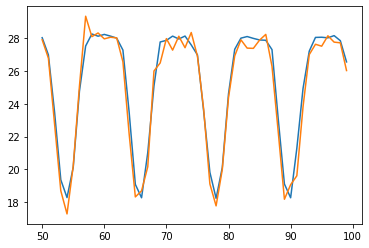

In [136]:
import matplotlib.pyplot as plt
plt.plot(train_results1['Train Predictions'][50:100])
plt.plot(train_results1['Actuals'][50:100])

In [137]:
val_predictions1 = model3.predict(X_val1).flatten()
val_results1 = pd.DataFrame(data={'Val Predictions':val_predictions1, 'Actuals':y_val1})
val_results1

,Val Predictions,Actuals
0,23.616707,23.1254
1,19.549515,19.0129
2,18.303738,17.7492
3,20.252708,20.8723
4,25.060804,25.2876
...,...,...
132,23.704210,23.3981
133,19.654556,20.1779
134,18.682106,19.4921
135,21.075464,23.6292


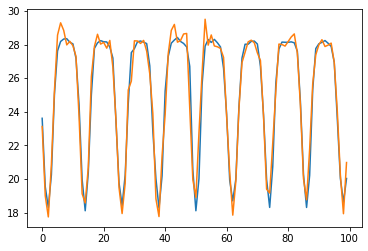

In [138]:
plt.plot(val_results1['Val Predictions'][:100])
plt.plot(val_results1['Actuals'][:100])

In [139]:
test_predictions1 = model3.predict(X_test1).flatten()
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y_test1})
test_results1

,Test Predictions,Actuals
0,27.958990,27.6793
1,28.068838,28.4904
2,28.253534,28.4580
3,28.290279,28.6736
4,28.316956,28.6002
...,...,...
112,28.072758,28.0642
113,27.966621,28.1230
114,27.228724,26.8624
115,23.733219,23.1842


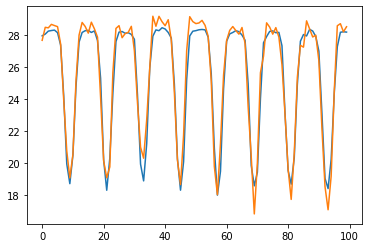

In [140]:
plt.plot(test_results1['Test Predictions'][:100])
plt.plot(test_results1['Actuals'][:100])

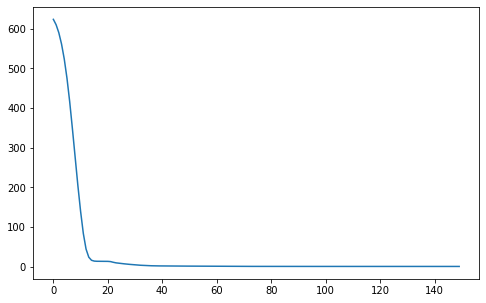

In [141]:
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'])

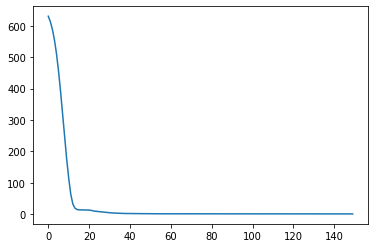

In [142]:
plt.plot(history1.history['val_loss'])

In [143]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(     Predictions  Actuals
 0      27.958990  27.6793
 1      28.068838  28.4904
 2      28.253534  28.4580
 3      28.290279  28.6736
 4      28.316956  28.6002
 ..           ...      ...
 112    28.072758  28.0642
 113    27.966621  28.1230
 114    27.228724  26.8624
 115    23.733219  23.1842
 116    19.602699  18.7124
 
 [117 rows x 2 columns], 0.5003104517558037)

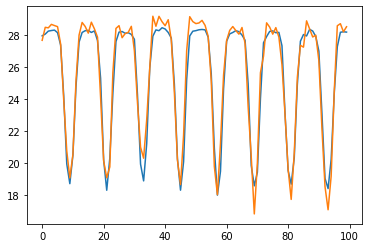

In [144]:
plot_predictions1(model3, X_test1, y_test1)